In [1]:
import pandas as pd 
import numpy as np
from core.core import *
from core.model2 import Stage1, Stage2

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set_style('whitegrid')
colors = sns.color_palette()

mpl.rcParams['font.size'] = 10
mpl.rcParams['axes.titlesize'] = 14
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 10
mpl.rcParams['legend.title_fontsize'] = 0
mpl.rcParams['figure.figsize'] = (8, 4)
linewidth = 1
FigureDir = "../Figures"

mu = 103
mustar = 100
sigma = 20
lam = 1000
rsquared = 0.2
rho = 0.5

stage2 = Stage2(mu, mustar, sigma, rho, lam, rsquared)
stage1 = Stage1(mu, mustar, sigma, rho, lam, rsquared)

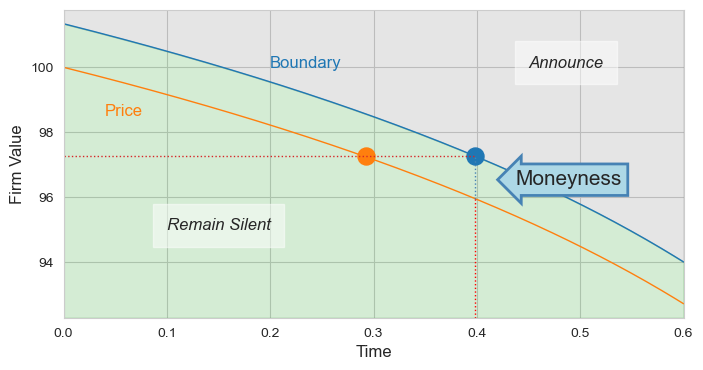

In [7]:
fig, ax1 = plt.subplots()
grid = np.linspace(0, 0.6, 200)
bdy = stage1.bdy(grid)

bdy.plot(
    ax=ax1, 
    label="Boundary", 
    color=colors[0], 
    lw=linewidth
)

price = pd.Series(
    [stage1.price1(t) for t in grid],
    index=grid
)
price.plot(
    ax=ax1, 
    color=colors[1], 
    label="Price", 
    lw=linewidth)

ax1.set_xlabel("Time")
# ax1.legend(loc="lower right")


y0, y1 = ax1.get_ylim()

ax1.fill_between(
    grid, bdy, y1,
    color=colors[7], 
    alpha=0.2,
)
ax1.fill_between(
    grid, y0, bdy,
    color=colors[2], 
    alpha=0.2,
)

ax1.set_xlim((0, 0.6))
ax1.set_ylim(y0, y1)

ax1.text(0.45, 100, "Announce", size="large", style='italic',
       bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

ax1.text(0.1, 95, "Remain Silent", size="large", style='italic',
       bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

ax1.hlines(
    bdy.iloc[132], 
    0, 
    grid[132], 
    lw=linewidth, 
    ls=":", 
    color=colors[3]
)
ax1.vlines(
    grid[132], 
    price.iloc[132], 
    bdy.iloc[132], 
    lw=linewidth, 
    ls=":", 
    color="steelblue"
)
ax1.vlines(
    grid[132], 
    ax1.get_ylim()[0],
    price.iloc[132], 
    lw=linewidth, 
    ls=":", 
    color="red"
)
ax1.text(
    0.54, 96.25, "Moneyness",
    ha="right", va="bottom", rotation=0, size=15,
    bbox=dict(
        boxstyle="larrow,pad=0.3",
        fc="lightblue", ec="steelblue", lw=2
    )
)
ax1.scatter(
    grid[97],
    bdy.iloc[132],
    s=150,
    color=colors[1]
)
ax1.scatter(
    grid[132],
    bdy.iloc[132],
    s=150,
    color=colors[0]
)
ax1.set_ylabel("Firm Value")
ax1.text(0.2, 100, "Boundary", size="large", color=colors[0])
ax1.text(0.04, 98.5, "Price", size="large", color=colors[1])
fig.savefig(f'{FigureDir}/model2_moneyness.pdf')

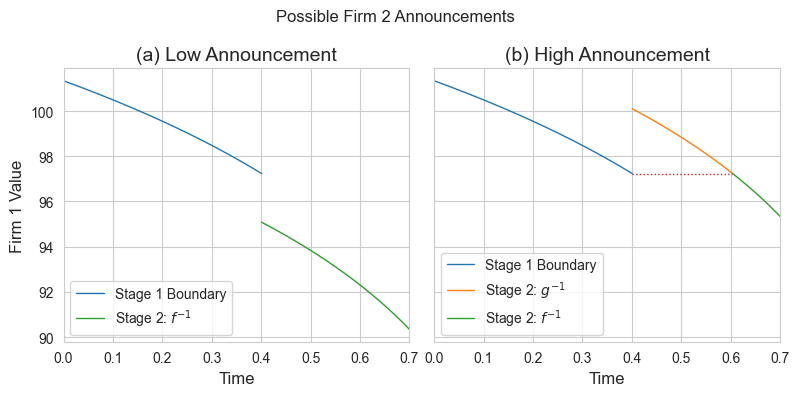

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
grid1 = np.linspace(0, 0.6, 200)
grid1 = grid1[:134]
bdy1 = stage1.bdy(grid1)

bdy1.plot(
    ax=ax1, 
    label="Stage 1 Boundary", 
    color=colors[0], 
    lw=linewidth
)

bdy1.plot(
    ax=ax2, 
    color=colors[0], 
    lw=linewidth,
    label="Stage 1 Boundary"
)


grid2 = np.linspace(grid1[-1], 0.7, 200)
price21 = [
    stage2.price(t=0.2, b=bdy1.iloc[-1], x2=bdy1.iloc[-1], u=u) 
    for u in grid2
]
price22 = [
    stage2.price(t=0.2, b=bdy1.iloc[-1], x2=bdy1.iloc[-1]+10, u=u) 
    for u in grid2
]
ax1.plot(grid2, price21, lw=linewidth, c=colors[2], label=r"Stage 2: $f^{-1}$")

grid2a = [
    u for u in grid2 
    if stage2.price(
        t=grid1[-1], 
        b=bdy1.iloc[-1], 
        x2=bdy1.iloc[-1]+10, 
        u=u) >= bdy1.iloc[-1]
] 
price22a = [
    stage2.price(t=0.2, b=bdy1.iloc[-1], x2=bdy1.iloc[-1]+10, u=u) 
    for u in grid2a
]
ax2.plot(grid2a, price22a, lw=linewidth, c=colors[1], label=r"Stage 2: $g^{-1}$")

grid2 = [x for x in grid2 if x not in grid2a[:-1]]
price22 = [x for x in price22 if x not in price22a[:-1]]
ax2.plot(grid2, price22, lw=linewidth, c=colors[2], label=r"Stage 2: $f^{-1}$")

ax2.hlines(bdy1.iloc[-1], grid2a[0], grid2a[-1], ls=":", lw=linewidth, color=colors[3])
ax1.set_xlim((0, 0.70))
ax2.set_xlim((0, 0.70))
ax1.set_xlabel("Time")
ax2.set_xlabel("Time")
ax1.legend(loc="lower left")
ax2.legend(loc="lower left")
ax1.set_ylabel("Firm 1 Value")
panel1_title = "(a) Low Announcement"
panel2_title = "(b) High Announcement"
ax1.set_title(panel1_title)
ax2.set_title(panel2_title)
fig.suptitle("Possible Firm 2 Announcements")
fig.tight_layout()
fig.savefig(f'{FigureDir}/model2_post_disclosure.pdf')
plt.show()

In [6]:
bdy1.iloc[-1]

np.float64(97.23341753863426)

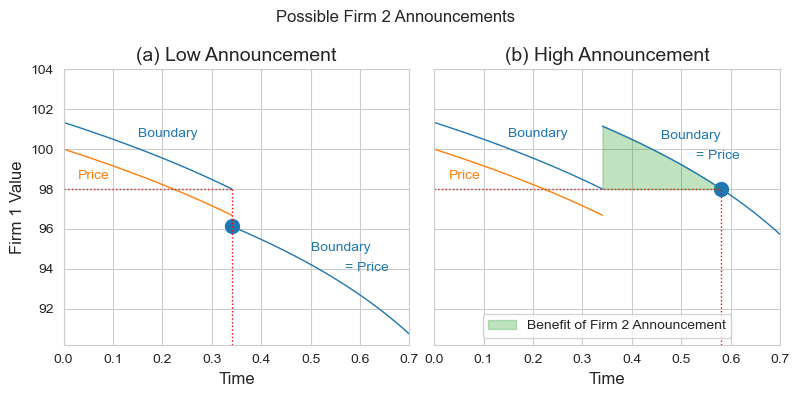

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
grid1 = np.linspace(0, 0.6, 200)
grid1 = grid1[:114]
bdy1 = stage1.bdy(grid1)

bdy1.plot(
    ax=ax1, 
    label="Boundary", 
    color=colors[0], 
    lw=linewidth
)

bdy1.plot(
    ax=ax2, 
    color=colors[0], 
    lw=linewidth
)

price = pd.Series(
    [stage1.price1(t) for t in grid1],
    index=grid1
)
price.plot(
    ax=ax1, 
    color=colors[1], 
    lw=linewidth
)
price.plot(
    ax=ax2, 
    color=colors[1], 
    lw=linewidth
)

grid2 = np.linspace(grid1[-1], 0.7, 200)
price21 = [
    stage2.price(t=0.2, b=bdy1.iloc[-1], x2=bdy1.iloc[-1], u=u) 
    for u in grid2
]
price22 = [
    stage2.price(t=0.2, b=bdy1.iloc[-1], x2=bdy1.iloc[-1]+10, u=u) 
    for u in grid2
]
ax1.plot(grid2, price21, lw=linewidth)
ax2.plot(grid2, price22, lw=linewidth)

ax1.hlines(
    bdy1.iloc[-1], 
    0, 
    grid1[-1], 
    lw=linewidth, 
    ls=":", 
    color=colors[3]
)

grid2a = [
    u for u in grid2 
    if stage2.price(
        t=grid1[-1], 
        b=bdy1.iloc[-1], 
        x2=bdy1.iloc[-1]+10, 
        u=u) >= bdy1.iloc[-1]
] 

ax2.hlines(
    bdy1.iloc[-1], 
    0, 
    grid2a[-1], 
    lw=linewidth, 
    ls=":", 
    color=colors[3]
)

y0 = ax2.get_ylim()[0]

ax1.vlines(
    grid1[-1], 
    y0,
    bdy1.iloc[-1], 
    lw=linewidth, 
    ls=":", 
    color="red"
)

ax2.vlines(
    grid2a[-1], 
    y0,
    bdy1.iloc[-1], 
    lw=linewidth, 
    ls=":", 
    color="red"
)

ax1.scatter(
    grid2[0],
    price21[0],
    s=100,
    color=colors[0]
)
ax2.scatter(
    grid2a[-1],
    bdy1.iloc[-1],
    s=100,
    color=colors[0]
)
ax1.text(0.15, 100.6, "Boundary", color=colors[0])
ax1.text(0.03, 98.5, "Price", color=colors[1])
ax2.text(0.15, 100.6, "Boundary", color=colors[0])
ax2.text(0.03, 98.5, "Price", color=colors[1])

ax1.text(0.5, 94.9, "Boundary", color=colors[0])
ax2.text(0.46, 100.5, "Boundary", color=colors[0])

ax1.text(0.57, 93.9, "= Price", color=colors[0])
ax2.text(0.53, 99.5, "= Price", color=colors[0])

ax2.fill_between(
    grid2a, 
    [bdy1.iloc[-1] for x in grid2a], 
    [
        stage2.price(grid1[-1], bdy1.iloc[-1], bdy1.iloc[-1]+10, u) 
        for u in grid2a
    ],
    color=colors[2], 
    alpha=0.3, 
    label="Benefit of Firm 2 Announcement"
)
ax2.legend(loc="lower center")
ax1.set_xlim((0, 0.7))
ax2.set_xlim((0, 0.7))
ax1.set_ylim((90, 104))
ax2.set_ylim((90, 104))
ax1.set_xlabel("Time")
ax2.set_xlabel("Time")
# ax1.legend(loc="lower right")
ax1.set_ylabel("Firm 1 Value")
ax1.set_ylim((y0, ax1.get_ylim()[1]))
panel1_title = "(a) Low Announcement"
panel2_title = "(b) High Announcement"
ax1.set_title(panel1_title)
ax2.set_title(panel2_title)
fig.suptitle("Possible Firm 2 Announcements")
fig.tight_layout()
fig.savefig(f'{FigureDir}/model2_benefit_waiting.pdf')
plt.show()